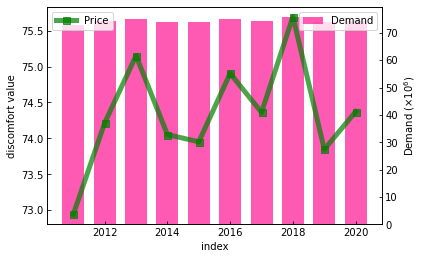

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

file_name = 'data_files/discomfort.csv'
file = pd.read_csv(file_name)

file_name_y = 'discomfort_year.csv'
file_y = pd.read_csv(file_name_y)

# sns.lmplot(x = 'index', y = 'discomfort', data=file, line_kws = {'color' : 'red'})

fig, ax1 = plt.subplots()
ax1.plot(file_y['date'], file_y['discomfort'], '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='Price')
# ax1.set_ylim(50, 80)
ax1.set_xlabel('index')
ax1.set_ylabel('discomfort value')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(file_y['date'], file_y['discomfort'], color='deeppink', label='Demand', alpha=0.7, width=0.7)
# ax2.set_ylim(50, 80)
ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

# sns.regplot(x='index',y='discomfort',data=file, fit_reg=True)

In [38]:
year = []
for i in file['date']:
    year.append(i[:4])

set_year = set(year)
to_dp = []
for i in set_year:
    to_dp.append(i)
to_dp

['2011',
 '2015',
 '2014',
 '2016',
 '2020',
 '2018',
 '2013',
 '2019',
 '2012',
 '2017']

In [91]:
year_avg = []
idx_iter = 1
sum_discomfort = 0
start_year = '2011'

for idx in range(0, len(file), 3):
    each_set = file['discomfort'][idx : idx + 3]
    num = file['date'][idx][:4]
    year_avg.append(sum(each_set.values) / 3)
    
year_avg

[72.93911333333332,
 74.213829,
 75.15102666666667,
 74.05239666666667,
 73.95103999999999,
 74.90428666666666,
 74.36172333333333,
 75.69474333333334,
 73.84645333333333,
 74.37188666666667]

In [94]:
data = pd.DataFrame({
    'date': sorted(to_dp),
    'discomfort': year_avg
})

In [96]:
data.to_csv('discomfort_year.csv', sep=',')

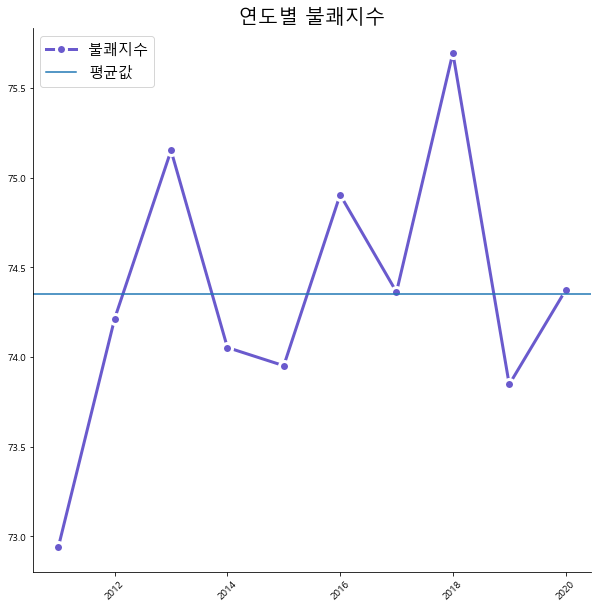

In [104]:
import matplotlib
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic')

mean_sales = float(np.mean(file_y['discomfort']))
 
 
fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.spines['right'].set_visible(False) ## 오른쪽 축 숨김
ax.spines['top'].set_visible(False) ## 위쪽 축 숨김
 
args_plot = [file_y['date'], file_y['discomfort']] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='slateblue', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=3, # 선 두께 
    marker='o', # 마커 모양
    markersize=10, # 마커 사이즈
    markeredgecolor='white', # 마커 테두리 색깔
    markeredgewidth=3, # 마커 테두리 두께
)
 
ax.plot(label='불쾌지수', *args_plot,**config_plot) ## 선그래프 생성 - 범례라벨 추가
 
ax.axhline(mean_sales,label='평균값') ## 평균값을 y좌표로 하는 수평선 생성
ax.text(0,mean_sales+10,f'Mean of Sales : {mean_sales}',fontsize=13) ## 평균 매출 텍스트 출력
 
ax.legend(loc='upper left', fontsize=15) ## 범례 생성
 
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 45도 회전
plt.title('연도별 평균 불쾌지수',fontsize=20) ## 타이틀 설정
plt.savefig('discomfort.png')
plt.show()

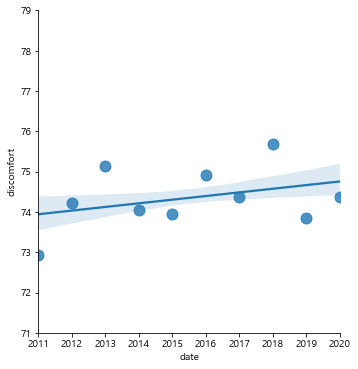

In [126]:
sns.lmplot(x='date',y='discomfort',data=file_y, ci=60, scatter_kws={"s": 120, "alpha": 0.8}, fit_reg=True)
plt.ylim(71, 79)
plt.savefig('regplot.png')
